Step 1: Imports and Dataset Load

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

Step 2: Define Features and Target

In [4]:
X = df.drop(columns=['C150_4'])
y = df['C150_4']

Step 3: Train/Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 4: Model Definitions

In [6]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "k-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR(),
}

Step 5: Train and Evaluate Models

In [7]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append((name, r2, mse))
    print(f"{name} - R^2: {r2:.4f}, MSE: {mse:.4f}")

Linear Regression - R^2: 0.8640, MSE: 0.0039
Random Forest - R^2: 0.8432, MSE: 0.0044
Decision Tree - R^2: 0.6497, MSE: 0.0099
k-Nearest Neighbors - R^2: 0.5934, MSE: 0.0115
Support Vector Regressor - R^2: 0.6573, MSE: 0.0097


Step 6: Visual Comparison of Predictions (for regression models)

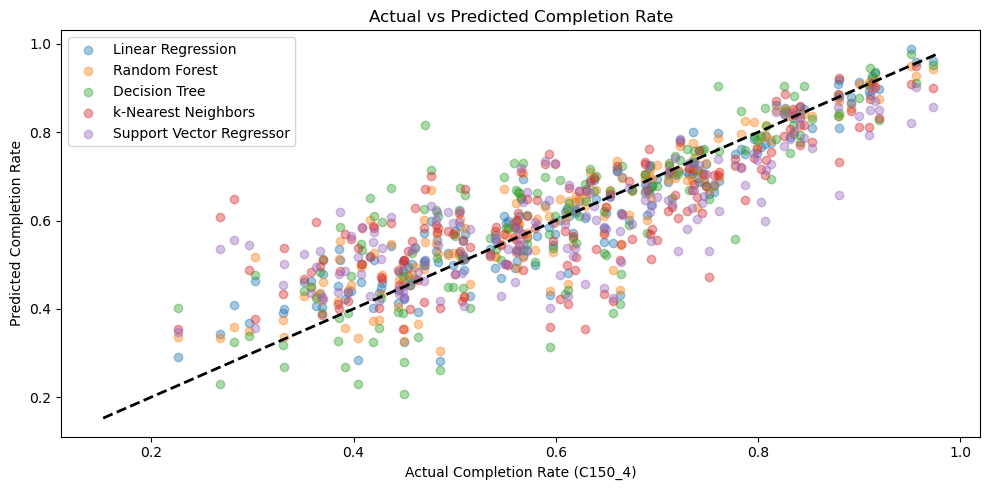

In [8]:
plt.figure(figsize=(10, 5))
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, alpha=0.4, label=name)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Completion Rate (C150_4)')
plt.ylabel('Predicted Completion Rate')
plt.title('Actual vs Predicted Completion Rate')
plt.legend()
plt.tight_layout()
plt.show()